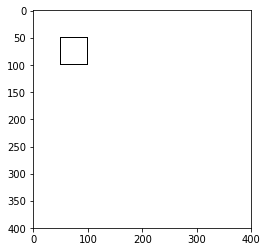

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pyclipper
from shapely.geometry import Polygon
%matplotlib inline

canvas = np.ones((400, 400), dtype=np.uint8)

box = np.array([
    [50, 50],
    [100, 50],
    [100, 100],
    [50, 100],
])

canvas = cv2.polylines(canvas, [box], True, 0, 1)


plt.imshow(canvas*255, cmap='gray')
plt.show()

shrink distance: 10.5


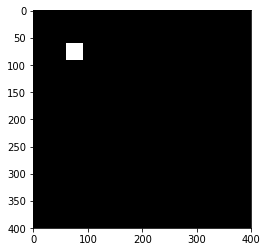

In [8]:
shrink_ratio = 0.4
score_map = np.zeros((400, 400), dtype=np.uint8)

clipper = pyclipper.PyclipperOffset()
clipper.AddPath(box, pyclipper.JT_ROUND, pyclipper.ET_CLOSEDPOLYGON)
poly = Polygon(box)
distance = poly.area * (1 - np.power(shrink_ratio, 2)) / poly.length
print('shrink distance: {}'.format(distance))
shrinked_box = clipper.Execute(-distance)[0]

score_map = cv2.rectangle(score_map, tuple(shrinked_box[0]), tuple(shrinked_box[2]), 1, -1)

plt.imshow(score_map*255, cmap='gray')
plt.show()

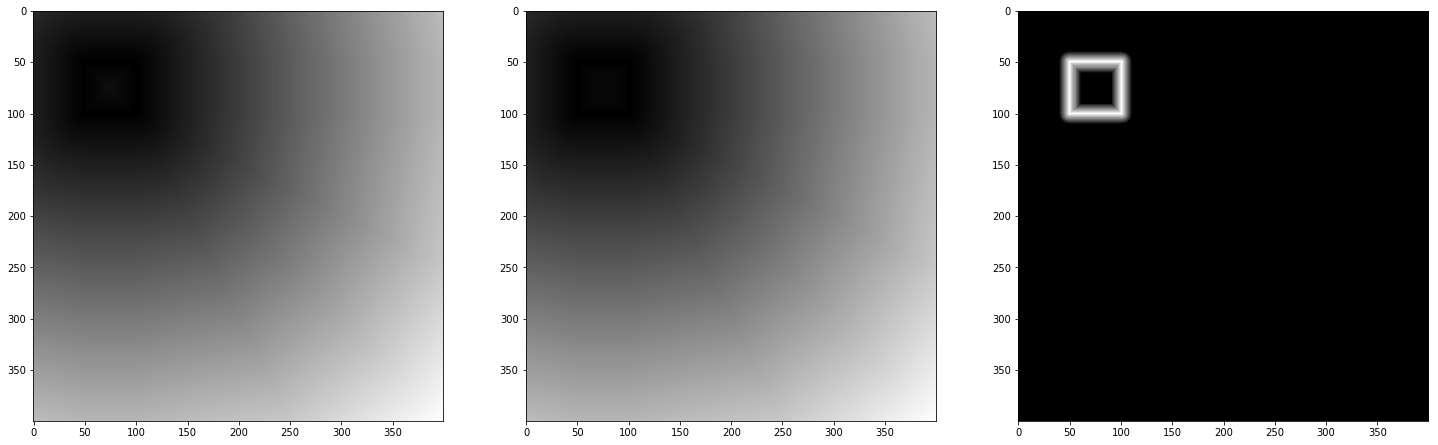

In [9]:
def imshow(ax, img):
#     norm_img = cv2.normalize(img, 0, 1.0, cv2.NORM_MINMAX)
    norm_img = img / img.max() * 255
    ax.imshow((norm_img).astype(np.uint8).copy(), cmap='gray')

fig, axs = plt.subplots(1, 3)
fig.set_figheight(25)
fig.set_figwidth(25)

# 所有非零点到零点的距离，即
dist = cv2.distanceTransform(canvas, cv2.DIST_L2, 5)
imshow(axs[0], dist)
# axs[0].axis('off')

dist[score_map == 1] = distance
imshow(axs[1], dist)

dist = 1 - np.clip(dist / distance, 0, 1)
imshow(axs[2], dist)

fig.show()